In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, 
                                   width_shift_range=0.1, height_shift_range=0.1, fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('train', target_size=(150,150), batch_size=b_size, class_mode='binary')

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('test', target_size=(150,150), batch_size=b_size, class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])       
#원핫인코딩으로 하지 않는경우, sparse categorical crossentropy사용???

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [6]:
steps_train = len(train_generator)
steps_test = len(test_generator)
print(steps_train, steps_test)

32 24


In [7]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14570221789544981332,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17713344705885630370
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4951408640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4791215033911785178
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8027220401780816263
 physical_device_desc: "device: XLA_GPU device"]

In [8]:
hist = model.fit(train_generator, steps_per_epoch=steps_train, epochs=20, 
                 validation_data=test_generator, validation_steps=steps_test)

Epoch 1/20
32/32 [==============================] - 2s 50ms/step - loss: 0.7093 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 1s 22ms/step - loss: 0.6926 - accuracy: 0.4812 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6883 - accuracy: 0.5688 - val_loss: 0.6794 - val_accuracy: 0.5083
Epoch 4/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6791 - accuracy: 0.5750 - val_loss: 0.6718 - val_accuracy: 0.5250
Epoch 5/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6664 - accuracy: 0.5875 - val_loss: 0.6577 - val_accuracy: 0.6750
Epoch 6/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6599 - accuracy: 0.6250 - val_loss: 0.6181 - val_accuracy: 0.7750
Epoch 7/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6149 - accuracy: 0.7000 - val_loss: 0.5612 - val_accuracy: 0.7250
Epoch 8/20
32

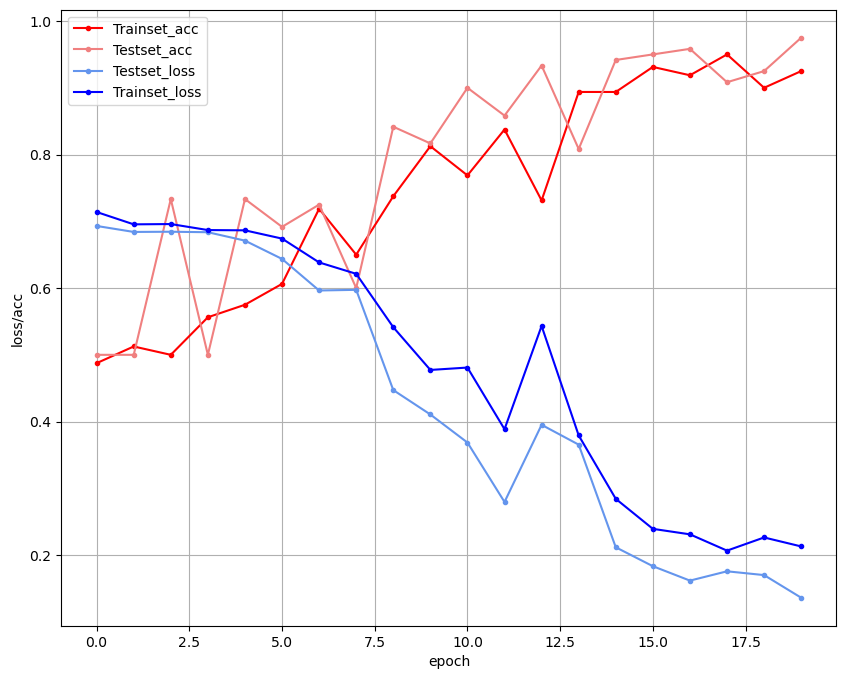

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize=(10,8))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()